In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

https://github.com/lukasgarbas/nlp-text-emotion/blob/master/bert.ipynb

In [3]:
dataset = pd.read_csv('Bhaav-Dataset.csv')

# https://www.analyticsvidhya.com/blog/2021/12/fine-tune-bert-model-for-sentiment-analysis-in-google-colab/

https://swatimeena989.medium.com/bert-text-classification-using-keras-903671e0207d

In [4]:
import pandas as pd
import numpy as np

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses

In [6]:
dataset

,Sentences,Annotation
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1
4,गाँव में कितनी हलचल है,1
...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1


In [7]:
dataset['Annotation'].value_counts()

4    11697
2     3168
1     2463
3     1512
0     1464
Name: Annotation, dtype: int64

In [8]:
dataset['Emotion'] = np.where(
    dataset['Annotation'] == 0, 'Anger', np.where(
        dataset['Annotation'] == 1, 'Joy', np.where(
            dataset['Annotation'] == 2, 'Sad', np.where(
                dataset['Annotation'] == 3, 'Suspense', 'Neutral'))))
dataset

,Sentences,Annotation,Emotion
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1,Joy
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1,Joy
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1,Joy
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1,Joy
4,गाँव में कितनी हलचल है,1,Joy
...,...,...,...
20299,फिर यहाँ सर्दी हो जाती है,4,Neutral
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4,Neutral
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4,Neutral
20302,लेकिन यह बेंच मुझे सबसे अच्छी लगती है,1,Joy


In [9]:
dataset0=dataset.loc[dataset['Annotation'] == 0]
dataset0

,Sentences,Annotation,Emotion
16,अब जल्दी पड़ी है कि लोग ईदगाह क्यों नहीं चलते,0,Anger
17,इन्हें गृहस्थी की चिंताओं से क्या प्रयोजन,0,Anger
18,"सेवैयों के लिए दूध ओर शक्कर घर में है या नहीं,...",0,Anger
19,वह क्या जानें कि अब्बाजान क्यों बदहवास चौधरी क...,0,Anger
20,"उन्हें क्या खबर कि चौधरी आँखें बदल लें, तो यह ...",0,Anger
...,...,...,...
19895,"बता, किसको आटा दे आया, नहीं तो तेरी खाल उधेड़ क...",0,Anger
19899,"अम्माँ , तूने आटा नहीं निकाला",0,Anger
19900,देख कितना आटा सारे आँगन में बिखरा पड़ा है,0,Anger
19931,दिल में कहा —इस वक्त तुम्हें कजाकी पर दया आ गय...,0,Anger


In [10]:
dataset1=dataset.loc[dataset['Annotation'] == 1]
dataset1

,Sentences,Annotation,Emotion
0,रमजान के पूरे तीस रोजों के बाद ईद आयी है,1,Joy
1,"कितना मनोहर, कितना सुहावना प्रभाव है",1,Joy
2,"वृक्षों पर अजीब हरियाली है, खेतों में कुछ अजीब...",1,Joy
3,"आज का सूर्य देखो, कितना प्यारा, कितना शीतल है,...",1,Joy
4,गाँव में कितनी हलचल है,1,Joy
...,...,...,...
20292,इसे सुनते ही मुझे पता चल जाता है कि उन्होंने ए...,1,Joy
20294,लोगों में अब इतना चैन कहाँ कि शांति से खड़े रहे...,1,Joy
20295,मैं तो यहाँ बैठी ही हूँ,1,Joy
20296,आपके बच्चे को देखती रहूँगी,1,Joy


In [11]:
dataset2=dataset.loc[dataset['Annotation'] == 2]
dataset2

,Sentences,Annotation,Emotion
27,"वह चार-पाँच साल का गरीब- सूरत, दुबला-पतला लड़क...",2,Sad
28,किसी को पता क्या बीमारी है,2,Sad
29,कहती तो कौन सुनने वाला था,2,Sad
30,"दिल पर जो कुछ बीतती थी, वह दिल में ही सहती थी ...",2,Sad
32,उसके अब्बाजान रूपये कमाने गए हैं,2,Sad
...,...,...,...
20276,"पहले जब कोई इस तरह की बात कहता था, तो मैं बीच ...",2,Sad
20279,"जी हाँ, मुझे यह लगता था कि जब तक मैं उन्हें यह...",2,Sad
20280,"जी, मैंने कहीं पढ़ा था कि बड़े होने का मतलब है क...",2,Sad
20281,वह हमेशा खाली रहेगा,2,Sad


In [12]:
dataset3=dataset.loc[dataset['Annotation'] == 3]
dataset3

,Sentences,Annotation,Emotion
106,क्लब-घर में जादू होता है,3,Suspense
107,"सुना है, यहाँ मुर्दो की खोपड़ियाँ दौड़ती हैं",3,Suspense
108,"और बड़े-बड़े तमाशे होते हैं, पर किसी को अंदर न...",3,Suspense
109,और वहाँ शाम को साहब लोग खेलते हैं,3,Suspense
110,"बड़े-बड़े आदमी खेलते हैं, मूँछो दाढ़ी वाले",3,Suspense
...,...,...,...
20262,लेकिन मेरा नाम वहाँ कहीं न था,3,Suspense
20263,"कुछ और निशान थे, जिन्हें मैंने पहले कभी नहीं द...",3,Suspense
20268,क्या मेरा पति किसी दूसरी औरत के साथ जाता था,3,Suspense
20269,क्या वह मेरे प्रति क्रूर था,3,Suspense


In [13]:
dataset4=dataset.loc[dataset['Annotation'] == 4]
dataset4

,Sentences,Annotation,Emotion
5,ईदगाह जाने की तैयारियाँ हो रही हैं,4,Neutral
6,"किसी के कुरते में बटन नहीं है, पड़ोस के घर में...",4,Neutral
7,"किसी के जूते कड़े हो गए हैं, उनमें तेल डालने क...",4,Neutral
8,जल्दी-जल्दी बैलों को सानी-पानी दे दें,4,Neutral
9,ईदगाह से लौटते-लौटते दोपहर हो जायगी,4,Neutral
...,...,...,...
20298,"जी हाँ, शाम होने तक यहीं रहती हूँ",4,Neutral
20299,फिर यहाँ सर्दी हो जाती है,4,Neutral
20300,दिन-भर मैं यह देखती रहती हूँ कि धूप का टुकड़ा क...,4,Neutral
20301,"पार्क का कोई ऐसा कोना नहीं, जहाँ मैं घड़ी-आधा घ...",4,Neutral


In [14]:
dataset4_final=dataset4.sample(n = 3000)

In [15]:
frames = [dataset0,dataset1,dataset2, dataset3, dataset4_final]

In [16]:
dataset = pd.concat(frames)

In [17]:
dataset

,Sentences,Annotation,Emotion
16,अब जल्दी पड़ी है कि लोग ईदगाह क्यों नहीं चलते,0,Anger
17,इन्हें गृहस्थी की चिंताओं से क्या प्रयोजन,0,Anger
18,"सेवैयों के लिए दूध ओर शक्कर घर में है या नहीं,...",0,Anger
19,वह क्या जानें कि अब्बाजान क्यों बदहवास चौधरी क...,0,Anger
20,"उन्हें क्या खबर कि चौधरी आँखें बदल लें, तो यह ...",0,Anger
...,...,...,...
9899,अंधेरा गहरा होने लगा और मोनिका का बाप जा कर अप...,4,Neutral
17734,"कछुआ धीरे-धीरे चलता हुआ वहां पहुंचता है, आराम ...",4,Neutral
16940,वह रसोई के साथ ही कुछ मन अनाज रखने के लिए बने ...,4,Neutral
14522,कूलर बोल पड़ा,4,Neutral


In [18]:
'''
full_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(dataset['Sentences'].values, tf.string),
            tf.cast(dataset['Annotation'].values, tf.int32)
        )
    )
)
'''

"\nfull_dataset = (\n    tf.data.Dataset.from_tensor_slices(\n        (\n            tf.cast(dataset['Sentences'].values, tf.string),\n            tf.cast(dataset['Annotation'].values, tf.int32)\n        )\n    )\n)\n"

In [19]:
#dataset["Sentences"] = dataset["Sentences"].str.replace('\u002C','')
#dataset["Sentences"] = dataset["Sentences"].str.replace('\u002D','')

In [20]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#hindi_stopwords = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
#vectorizer = TfidfVectorizer(stop_words=hindi_stopwords)
#tfidf = vectorizer.fit_transform(dataset["Sentences"])

In [21]:
#df1 = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())

In [22]:
#dataset1 = pd.concat([dataset, df1], axis=1)
#dataset1

In [23]:
train_size = int(dataset.shape[0]*0.1)

In [24]:
dataset = dataset[['Sentences','Annotation']]

print(dataset.shape)
dataset

(11607, 2)


,Sentences,Annotation
16,अब जल्दी पड़ी है कि लोग ईदगाह क्यों नहीं चलते,0
17,इन्हें गृहस्थी की चिंताओं से क्या प्रयोजन,0
18,"सेवैयों के लिए दूध ओर शक्कर घर में है या नहीं,...",0
19,वह क्या जानें कि अब्बाजान क्यों बदहवास चौधरी क...,0
20,"उन्हें क्या खबर कि चौधरी आँखें बदल लें, तो यह ...",0
...,...,...
9899,अंधेरा गहरा होने लगा और मोनिका का बाप जा कर अप...,4
17734,"कछुआ धीरे-धीरे चलता हुआ वहां पहुंचता है, आराम ...",4
16940,वह रसोई के साथ ही कुछ मन अनाज रखने के लिए बने ...,4
14522,कूलर बोल पड़ा,4


In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(dataset, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (10446, 2)
test shape:  (1161, 2)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['Sentences'], dataset['Annotation'], test_size=0.1)

In [27]:
class_names=list(set(y_train.values))
class_names
num_class_names=len(class_names)
num_class_names

5

In [28]:
!pip install -q transformers

In [29]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from transformers import TFBertModel, BertConfig

In [30]:

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

In [31]:
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=num_class_names)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
sent= 'how to train the model, lets look at how a trained model calculates its prediction.'

In [33]:
tokenized_sequence= bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =40,pad_to_max_length = True,
return_attention_mask = True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [34]:
tokenized_sequence

{'input_ids': [101, 14796, 10114, 17767, 10105, 13192, 117, 13595, 10107, 25157, 10160, 14796, 169, 33626, 13192, 87838, 26171, 10474, 78089, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [35]:
bert_tokenizer.decode(tokenized_sequence['input_ids'])

'[CLS] how to train the model, lets look at how a trained model calculates its prediction. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [36]:
sentences=dataset['Sentences']
labels=dataset['Annotation']
len(sentences),len(labels)

(11607, 11607)

In [37]:
input_ids=[]
attention_masks=[]

for sent in sentences:
    bert_inp=bert_tokenizer.encode_plus(sent,add_special_tokens = True,max_length =64,pad_to_max_length = True,return_attention_mask = True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
labels=np.array(labels)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [38]:
len(input_ids),len(attention_masks),len(labels)

(11607, 11607, 11607)

In [39]:
import pickle
print('Preparing the pickle file.....')
path='/content/sample_data'

pickle_inp_path='bert_inp.pkl'
pickle_mask_path='bert_mask.pkl'
pickle_label_path='bert_label.pkl'


pickle.dump((input_ids),open(path+pickle_inp_path,'wb'))
pickle.dump((attention_masks),open(path+pickle_mask_path,'wb'))
pickle.dump((labels),open(path+pickle_label_path,'wb'))


print('Pickle files saved as ',pickle_inp_path,pickle_mask_path,pickle_label_path)

Preparing the pickle file.....
Pickle files saved as  bert_inp.pkl bert_mask.pkl bert_label.pkl


In [40]:
print('Loading the saved pickle files..')

input_ids=pickle.load(open(path+pickle_inp_path, 'rb'))
attention_masks=pickle.load(open(path+pickle_mask_path, 'rb'))
labels=pickle.load(open(path+pickle_label_path, 'rb'))

print('Input shape {} Attention mask shape {} Input label shape {}'.format(input_ids.shape,attention_masks.shape,labels.shape))

Loading the saved pickle files..
Input shape (11607, 64) Attention mask shape (11607, 64) Input label shape (11607,)


In [41]:
train_inp,val_inp,train_label,val_label,train_mask,val_mask=train_test_split(input_ids,labels,attention_masks,test_size=0.1)


In [42]:
train_inp.shape

(10446, 64)

In [43]:
val_inp.shape

(1161, 64)

In [44]:
train_label.shape

(10446,)

In [45]:
val_label.shape

(1161,)

In [46]:
train_mask.shape

(10446, 64)

In [47]:
val_mask.shape

(1161, 64)

In [48]:
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Model
import keras.backend as K
from keras.models import load_model
log_dir='tensorboard_data/tb_bert'

model_save_path='bert_model.h5'
#callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True),keras.callbacks.TensorBoard(log_dir=log_dir)]
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath=model_save_path,save_weights_only=True,monitor='val_loss',mode='min',save_best_only=True)]

In [49]:
pip install -q tf-models-official==2.4.0

In [50]:
from official import nlp
from official.nlp import bert
import official.nlp.optimization

print('\nBert Model',bert_model.summary())
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

epochs = 10
batch_size = 32
eval_batch_size = 32

train_data_size = len(train_label)
steps_per_epoch = int(train_data_size / batch_size)
num_train_steps = steps_per_epoch * epochs
warmup_steps = int(epochs * train_data_size * 0.1 / batch_size)

# creates an optimizer with learning rate schedule
optimizer = nlp.optimization.create_optimizer(
    2e-5, num_train_steps=num_train_steps, num_warmup_steps=warmup_steps)
#optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5,epsilon=1e-08)

bert_model.compile(loss=loss,optimizer=optimizer,metrics=[metric])

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  177853440 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3845      
                                                                 
Total params: 177,857,285
Trainable params: 177,857,285
Non-trainable params: 0
_________________________________________________________________

Bert Model None


In [51]:
history=bert_model.fit([train_inp,train_mask],train_label,batch_size=32,epochs=10,validation_data=([val_inp,val_mask],val_label),callbacks=callbacks)
#history=bert_model.fit([train_inp,train_mask],train_label,batch_size=32,epochs=4,validation_data=([val_inp,val_mask],val_label))

Epoch 1/10
327/327 [==============================] - 345s 912ms/step - loss: 1.5623 - accuracy: 0.2769 - val_loss: 1.4831 - val_accuracy: 0.3557
Epoch 2/10
327/327 [==============================] - 294s 900ms/step - loss: 1.4648 - accuracy: 0.3585 - val_loss: 1.4340 - val_accuracy: 0.3824
Epoch 3/10
327/327 [==============================] - 296s 905ms/step - loss: 1.3148 - accuracy: 0.4587 - val_loss: 1.3464 - val_accuracy: 0.4427
Epoch 4/10
327/327 [==============================] - 292s 893ms/step - loss: 1.1728 - accuracy: 0.5431 - val_loss: 1.3626 - val_accuracy: 0.4556
Epoch 5/10
327/327 [==============================] - 292s 893ms/step - loss: 1.0213 - accuracy: 0.6075 - val_loss: 1.4194 - val_accuracy: 0.4522
Epoch 6/10
327/327 [==============================] - 292s 894ms/step - loss: 0.8860 - accuracy: 0.6715 - val_loss: 1.5326 - val_accuracy: 0.4565
Epoch 7/10
327/327 [==============================] - 292s 893ms/step - loss: 0.7606 - accuracy: 0.7255 - val_loss: 1.6074 -

In [52]:
!pip install -q transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from transformers import TFBertModel, BertConfig
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Model
import keras.backend as K
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses





In [53]:
model_save_path='bert_model.h5'


In [54]:
trained_model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased',num_labels=5)
trained_model.compile(loss=loss,optimizer=optimizer, metrics=[metric])
trained_model.load_weights(model_save_path)



All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
preds = trained_model.predict([val_inp,val_mask],batch_size=32)

In [ ]:
print(preds)

In [ ]:
pred_labels = np.argmax(preds.logits, axis=1)

In [ ]:
print(pred_labels)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,classification_report

In [ ]:
print(len(pred_labels))

In [ ]:
f1 = f1_score(val_label,pred_labels,average="weighted")
print('F1 score',f1)

In [62]:
print('Classification Report')
print(classification_report(val_label,pred_labels))

Classification Report
              precision    recall  f1-score   support

           0       0.22      0.14      0.17       123
           1       0.51      0.43      0.47       252
           2       0.49      0.68      0.57       328
           3       0.39      0.22      0.28       155
           4       0.40      0.43      0.41       303

    accuracy                           0.44      1161
   macro avg       0.40      0.38      0.38      1161
weighted avg       0.43      0.44      0.43      1161



In [63]:
print('Training and saving built model.....')  

Training and saving built model.....


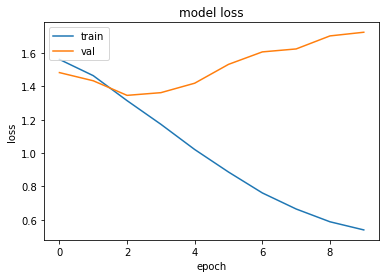

In [64]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()